In [6]:
import sklearn.datasets as dt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score, classification_report

In [7]:
bc = dt.load_breast_cancer()
bre_cs =  pd.DataFrame(bc.data, columns = bc.feature_names)
bre_cs['Target']= bc.target
train, test =split(bre_cs, test_size = 0.3, random_state = 12)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train.drop('Target', axis = 1), train.Target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rf = RandomForestClassifier(max_features = 'auto', oob_score = True, n_estimators= 10)
rf.fit(train.drop('Target', axis = 1), train.Target)

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
rf.oob_score_

0.9371859296482412

In [14]:
rf.feature_importances_

array([0.06868796, 0.0163592 , 0.0058889 , 0.00296915, 0.00240251,
       0.00507854, 0.19387314, 0.09818136, 0.00069823, 0.00353315,
       0.00071516, 0.000321  , 0.00360397, 0.00444737, 0.00281134,
       0.00388355, 0.00549692, 0.00836321, 0.00346281, 0.01264265,
       0.18800198, 0.00414643, 0.16539671, 0.05681902, 0.0032122 ,
       0.02524185, 0.0745326 , 0.02728602, 0.00387899, 0.0080641 ])

In [15]:
y_pred_rf = rf.predict(test.drop('Target', axis = 1))
print(classification_report(y_true = test.Target, y_pred = y_pred_rf))
print('Accuracy Score = ', accuracy_score(y_true = test.Target, y_pred = y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        64
           1       0.91      0.95      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Accuracy Score =  0.9122807017543859


In [16]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(train.drop('Target', axis = 1), train.Target)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [17]:
y_pred = abc.predict(test.drop('Target', axis = 1))

In [18]:
print(classification_report(y_true = test.Target, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        64
           1       0.93      0.96      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train.drop('Target', axis = 1))
X_test = sc.fit_transform(test.drop('Target', axis = 1))
Y_train = train.Target
Y_test = test.Target

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators= 20, learning_rate= 0.1, max_features = 3, random_state = 12)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
gbm.score(X_test, Y_test)

0.9064327485380117

In [22]:
gbm.score(X_train, Y_train)

0.9974874371859297

In [23]:
from xgboost import XGBClassifier
xgbm = XGBClassifier()
xgbm.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
xgbm.score(X_train, Y_train)

1.0

In [25]:
xgbm.score(X_test, Y_test)

0.9415204678362573

In [27]:
# hypertunimng of parameters 
# Grid Search CV
# Random Search CV


# Text Mining

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [29]:
paths = [r'youtube/Youtube01-Psy.csv',
r'youtube/Youtube02-KatyPerry.csv',
r'youtube/Youtube03-LMFAO.csv',
r'youtube/Youtube04-Eminem.csv',
r'youtube/Youtube05-Shakira.csv']

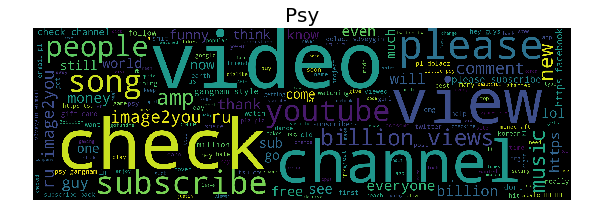

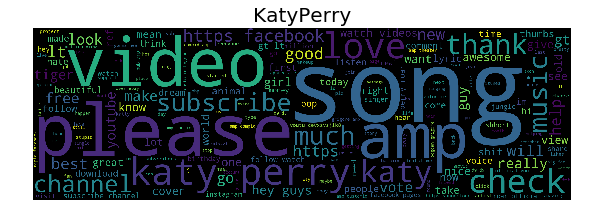

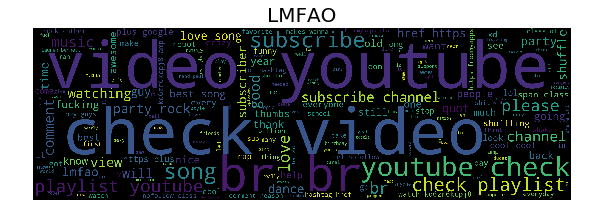

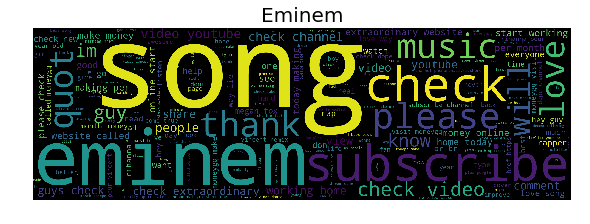

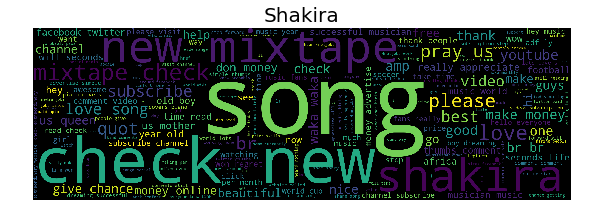

In [71]:
for f in paths:
    data = pd.read_csv(f)
    data.head()

    ''.join(list(data.CONTENT.str.lower()))

    comment_words = ''
    for val in data.CONTENT:
        tokens = str(val).lower().split()
        for words in tokens :
            comment_words = comment_words + words + ' '
    comment_words
    wc = WordCloud(width = 2500, height=800,
             background_color= 'black',stopwords= set(STOPWORDS), min_font_size= 10).generate(comment_words)

    
    
    plt.figure(figsize = (8,15), facecolor= None)
    plt.title(f.split('-')[1].split('.')[0], fontsize = 20)
    plt.imshow(wc)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()




In [72]:
import nltk

In [73]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  l



Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-80 Data Files
  [ ] city_database....... City Database
  [ ] cmudict............. The Carnegie Mellon Pronouncing Dictionary (0.6)
  [ ] comparative_sentences Comparative Sentence Dataset
  [ ] comtrans............ ComTrans Corpus Sample


Hit Enter to continue:  


  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian.............. Indian Language POS-Tagged Corpus
  [ ] jeita............... JEITA Public Morphologically Tagged Corpus (in
                           ChaSen format)
  [ ] kimmo............... PC-KIMMO Data Files
  [ ] knbc................ KNB C

Hit Enter to continue:  


  [ ] lin_thesaurus....... Lin's Dependency Thesaurus
  [ ] mac_morpho.......... MAC-MORPHO: Brazilian Portuguese news text with
                           part-of-speech tags
  [ ] machado............. Machado de Assis -- Obra Completa
  [ ] masc_tagged......... MASC Tagged Corpus
  [ ] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [ ] moses_sample........ Moses Sample Models
  [ ] movie_reviews....... Sentiment Polarity Dataset Version 2.0
  [ ] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.0
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [ ] names............... Names Corpus, Version 1.3 (1994-03-29)
  [ ] nombank.1.0......... NomBank Corpus 1.0
  [ ] nonbreaking_prefixes Non-Breaking Prefixes (Moses Decoder)
  [ ] nps_chat............ NPS Chat
  [ ] omw................. Open Mu

Hit Enter to continue:  


  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] pil................. The Patient Information Leaflet (PIL) Corpus
  [ ] pl196x.............. Polish language of the XX century sixties
  [ ] porter_test......... Porter Stemmer Test Files
  [ ] ppattach............ Prepositional Phrase Attachment Corpus
  [ ] problem_reports..... Problem Report Corpus
  [ ] product_reviews_1... Product Reviews (5 Products)
  [ ] product_reviews_2... Product Reviews (9 Products)
  [ ] propbank............ Proposition Bank Corpus 1.0
  [ ] pros_cons........... Pros and Cons
  [ ] ptb................. Penn Treebank
  [ ] punkt............... Punkt Tokenizer Models
  [ ] qc.................. Experimental Data for Question Classification
  [ ] reuters............. The Reuters-21578 benchmark corpus, ApteMod
                           version
  [ ] rslp................ RSLP Stemmer (Removedor de Sufixos da Lingua
             

Hit Enter to continue:  


  [ ] senseval............ SENSEVAL 2 Corpus: Sense Tagged Text
  [ ] sentence_polarity... Sentence Polarity Dataset v1.0
  [ ] sentiwordnet........ SentiWordNet
  [ ] shakespeare......... Shakespeare XML Corpus Sample
  [ ] sinica_treebank..... Sinica Treebank Corpus Sample
  [ ] smultron............ SMULTRON Corpus Sample
  [ ] snowball_data....... Snowball Data
  [ ] spanish_grammars.... Grammars for Spanish
  [ ] state_union......... C-Span State of the Union Address Corpus
  [ ] stopwords........... Stopwords Corpus
  [ ] subjectivity........ Subjectivity Dataset v1.0
  [ ] swadesh............. Swadesh Wordlists
  [ ] switchboard......... Switchboard Corpus Sample
  [ ] tagsets............. Help on Tagsets
  [ ] timit............... TIMIT Corpus Sample
  [ ] toolbox............. Toolbox Sample Files
  [ ] treebank............ Penn Treebank Sample
  [ ] twitter_samples..... Twitter Samples
  [ ] udhr2............... Universal Declaration of Human Rights Corpus
                     

Hit Enter to continue:  
Hit Enter to continue:  


  [ ] unicode_samples..... Unicode Samples
  [ ] universal_tagset.... Mappings to the Universal Part-of-Speech Tagset
  [ ] universal_treebanks_v20 Universal Treebanks Version 2.0
  [ ] vader_lexicon....... VADER Sentiment Lexicon
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] verbnet............. VerbNet Lexicon, Version 2.1
  [ ] webtext............. Web Text Corpus
  [ ] wmt15_eval.......... Evaluation data from WMT15
  [ ] word2vec_sample..... Word2Vec Sample
  [ ] wordnet............. WordNet
  [ ] wordnet_ic.......... WordNet-InfoContent
  [ ] words............... Word Lists
  [ ] ycoe................ York-Toronto-Helsinki Parsed Corpus of Old
                           English Prose

Collections:
  [ ] all-corpora......... All the corpora
  [ ] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [ ] all................. All packages
  [ ] book................ Everything used in the NLTK Book
  [ ] popular..........

Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  movie_reviews


        /opt/anaconda3/lib/nltk_data...
    Error downloading 'movie_reviews' from
        <https://raw.githubusercontent.com/nltk/nltk_data/gh-
        pages/packages/corpora/movie_reviews.zip>:   [Errno 30] Read-
        only file system:
        '/opt/anaconda3/lib/nltk_data/corpora/movie_reviews.zip'

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [75]:
from nltk.corpus import movie_reviews as mr

In [78]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


# Text Preprocessing

In [ ]:
- lower casing 
- punctuation --> subjective 
- stopwords --> modified based on the usage 
- frequent words --> 
- Rare words 
- Spelling Correcction 
- Abbreviation removal
- Tokenization
- POS tagging 
- Stemmming and lematization
- Ngrams 
- Term frequency

In [80]:
from textblob import TextBlob

In [82]:
TextBlob('I amm doing evrythng in an oorderly fashionnn').correct()

TextBlob("I am doing everything in an orderly fashion")

In [84]:
nltk.word_tokenize("I am doing everything in an orderly fashion. I love doing what i do.")

['I',
 'am',
 'doing',
 'everything',
 'in',
 'an',
 'orderly',
 'fashion',
 '.',
 'I',
 'love',
 'doing',
 'what',
 'i',
 'do',
 '.']

In [86]:
nltk.sent_tokenize("I am doing everything in an orderly fashion. I love doing what i do.")

['I am doing everything in an orderly fashion.', 'I love doing what i do.']

In [94]:
text = ' '.join([' '.join(i) for i in movie_reviews.sents()])

In [97]:
#nltk.sent_tokenize(text)

In [99]:
# Part of Speech 
nltk.pos_tag(nltk.word_tokenize('I am doing everything in an orderly fashion'))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('doing', 'VBG'),
 ('everything', 'NN'),
 ('in', 'IN'),
 ('an', 'DT'),
 ('orderly', 'JJ'),
 ('fashion', 'NN')]

In [100]:
# stemming
#helps --> help
#helping --> help
from nltk.stem import PorterStemmer
ps = PorterStemmer()
text = ' Playing a pivotal role in the play has boosted my confidence'
words = nltk.word_tokenize(text)
for w in words :
    print( w ,":", ps.stem(w))

Playing : play
a : a
pivotal : pivot
role : role
in : in
the : the
play : play
has : ha
boosted : boost
my : my
confidence : confid


In [109]:
from nltk.corpus.reader import wordnet

In [110]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [113]:
## lemmatization :
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text = ' playing a pivotal role in the play has boosted my confidence'
words = nltk.word_tokenize(text)
tag_sets = nltk.pos_tag(words)
for w,tag in tag_sets :
    #print(w,tag)
    t = get_wordnet_pos(tag)
    print( w ,tag,t,":", lemmatizer.lemmatize(w,pos =  t))

playing VBG v : play
a DT n : a
pivotal JJ a : pivotal
role NN n : role
in IN n : in
the DT n : the
play NN n : play
has VBZ v : have
boosted VBN v : boost
my PRP$ n : my
confidence NN n : confidence
